# Declaration of Originality

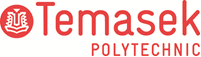

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :
* Tutorial Group                :  
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [7]:
## Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


1. Business Understanding
Goal: Predict the exam score based on certain characteristics of students & exam difficulty(Regression)

# 2. Data Understanding

## 2.1 Load dataset

In [8]:
## Read *.csv file into pandas DataFrame
## Read *.csv file into pandas DataFrame
FILE_PATH = 'Exam_Score_Prediction.csv'
df=pd.read_csv(FILE_PATH)
df



,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19997,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19998,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19999,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,20000,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


In [21]:
df=df.drop(['student_id'], axis=1)
df


,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


In [22]:
features = df.drop(['age', 'gender', 'course'], axis=1)
features


,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...
19995,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


I have determined that these factors affect exam_score.

-study_hours is important as the number of hours spent studying affects how much content a student can study properly. This affects the exam score as having more study hours gives students the time to understand more concepts better and test themselves as compared to a students with a lower study hours.

-class_attendance is an important factor as class_attendance  reflects on how much time a student has spent in class. A student with a lower class_attendance may score lower than a student with higher class_attendance as they were not present in as many classes and may have missed out on what is being taught in class and clarifications with regards to the content.

-internet_access is an important factor as internet_access grants students access to online resources such as Youtube, or any online material that they may have. Internet access also lets them communicate with peers to clairify anything when outside of school hours. 

-sleep_hours and sleep_quality is one of the most crucial factors that affects exam score. In order for the brain to absorb and retain information, it is important to have sufficient amounts of quality rest. I decided to not combine these factors into 1 as it is possible to merge them into one factor called 'sleep_score'. This is because they capture different information. A student could have 8 hours of poor sleep and another student could have 5 hours of good quality rest. Keeping them separate allows to learn how the 2 factors contribute separately to the exam_score without imposing assumptions, such as assuming that sleep quality and sleep hours has a linear relationship, sleep quality can compensated by more sleep hours, onto the model.


## 2.2 Summary Statistics

In [ ]:
## Understand the type of variable for each column



In [10]:
## Check for missing data


In [11]:
## Describe data distribution


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [12]:
## Understanding distribution of target


### 2.3.1.2 Understanding distribution of features

In [13]:
## Understanding distribution of features


### 2.3.2 Understanding relationship between variables

In [14]:
## Understanding relationship between variables


# 3. Data Preparation

## 3.1 Data Cleaning

In [15]:
## Clean data

## 3.2 Train-Test Split

In [16]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [17]:
## Initialise and train model


# 5. Model Evaluation

In [18]:
## Evaluate model


In [19]:
## New data

## Predict


## Iterative model development


In [20]:
## Further feature engineering / feature selection